**SALES PREDICTION**

Objective of the project:

To develop a machine learning model in Python that predicts sales based on advertising expenditures across various platforms, enabling businesses to optimize advertising strategies, allocate budgets effectively, and maximize sales potential through data-driven insights.


Dataset:

The dataset contains the following columns:

1. TV: Money spent on TV advertising (in thousands of dollars).

2. Radio: Money spent on radio advertising (in thousands of dollars).

3. Newspaper: Money spent on newspaper advertising (in thousands of dollars).

4. Sales: Sales generated (in thousands of units).

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Null Value Check**

In [8]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


There are no null values present in the dataset.

**Duplicate Value Check**

In [10]:
df.duplicated().sum()

0

There are no duplicate values present in the dataset.

**Outlier Check**

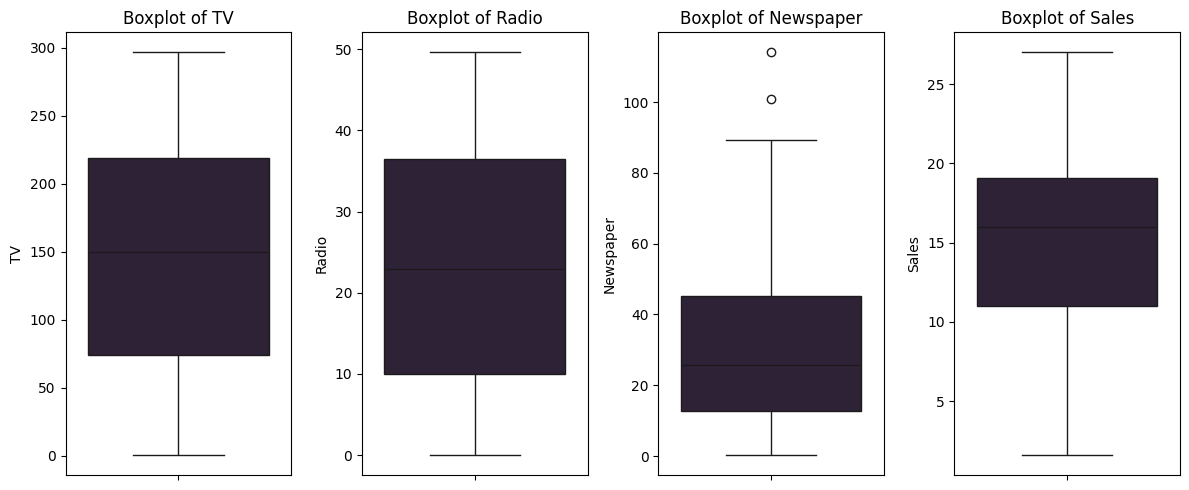

In [28]:
plt.figure(figsize=(12,5))

# Boxplot for TV
plt.subplot(1,4, 1)
sns.boxplot(y=df['TV'])
plt.title('Boxplot of TV')

# Boxplot for Radio
plt.subplot(1,4, 2)
sns.boxplot(y=df['Radio'])
plt.title('Boxplot of Radio')

# Boxplot for Newspaper
plt.subplot(1,4, 3)
sns.boxplot(y=df['Newspaper'])
plt.title('Boxplot of Newspaper')

# Boxplot for Sales
plt.subplot(1,4, 4)
sns.boxplot(y=df['Sales'])
plt.title('Boxplot of Sales')

# Adjust layout
plt.tight_layout()
plt.show()


Insight:

There are no outliers present in each column, This suggests that the data is well-contained without extreme deviations.

**Data Visualizations**

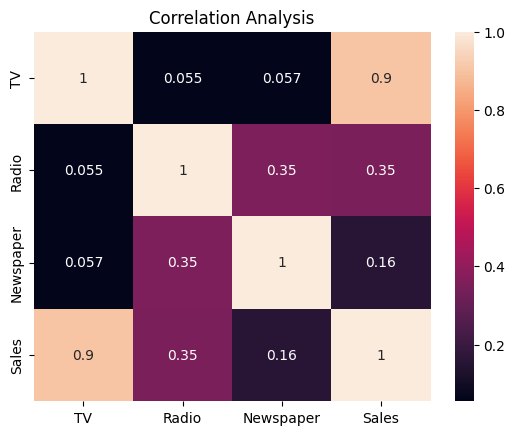

In [19]:
#Correlaton Analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Analysis')
plt.show()

Insight:

TV has much higher correlation with Sales as compared to Radio and Newspaper.

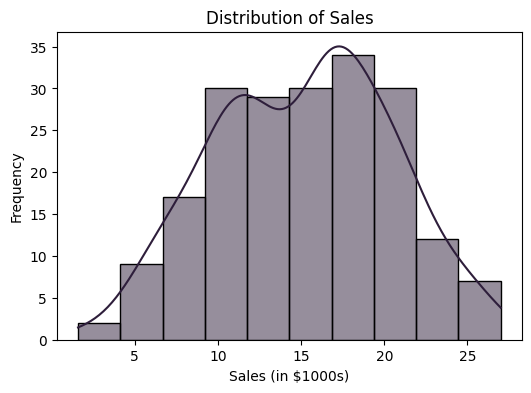

In [27]:
#Sales Distribution
plt.figure(figsize = (6,4))
sns.set_palette('mako')
sns.histplot(df['Sales'], kde = True)
plt.title("Distribution of Sales")
plt.xlabel("Sales (in $1000s)")
plt.ylabel("Frequency")
plt.show()

Insight:

The distribution is slightly right-skewed, with a majority of sales clustered between 10 and 20 (thousands of units).
There are fewer instances of very low or very high sales.

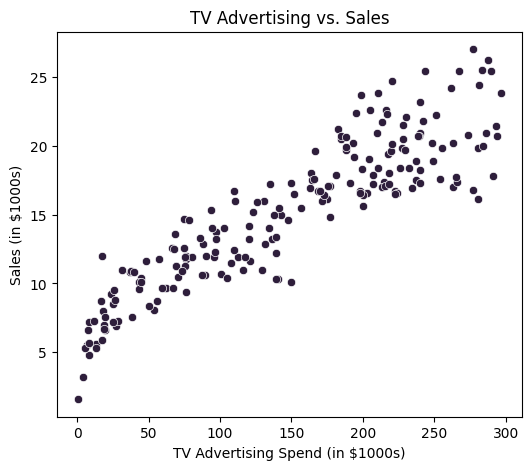

In [25]:
# Relationship between TV advertising and Sales
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['TV'], y=df['Sales'])
plt.title("TV Advertising vs. Sales")
plt.xlabel("TV Advertising Spend (in $1000s)")
plt.ylabel("Sales (in $1000s)")
plt.show()

Insight:

The plot indicates a positive relationship between TV advertising and sales.

**Model Building**

In [29]:
#Importing necessary libraries for Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Splitting the data into train, validation and test data
X = df.drop('Sales', axis=1)
y = df['Sales']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train,X_val, y_train,  y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42)

In [36]:
#Model Building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Making predictions
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

**Model Evaluation**

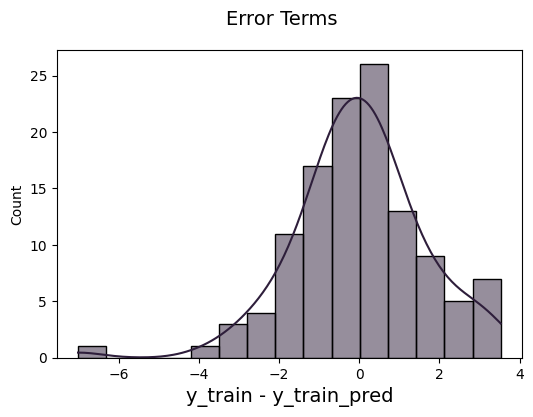

In [50]:
#Residual analysis
res = (y_train - train_pred)
plt.figure(figsize = (6,4))
sns.histplot(res, bins = 15, kde = True)
plt.suptitle('Error Terms', fontsize = 14)
plt.xlabel('y_train - y_train_pred', fontsize = 14)
plt.show()

Insight:

The histogram confirms that the model fits the data well, as most residuals are close to zero, implying that the predictions are accurate for a majority of the data points.

In [41]:
# Model Evaluation
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("Train Mean Squared Error:", train_mse)
print(f"Train R-squared: {train_r2:.2f}")

Train Mean Squared Error: 2.5660467504230056
Train R-squared: 0.91


*Training Performance*:

Mean Squared Error (MSE):

* The training MSE is 2.566, indicating that the model's average squared difference between predicted and actual sales is relatively low on the training set.
* A low MSE suggests the model is performing well on the training data.

R-squared (
𝑅
2
R
2
 ):

* The training
𝑅
2
R
2
  is 0.91, which means 91% of the variance in sales can be explained by TV advertising expenditure.
* This is an excellent fit, showing that the model captures the relationship well during training.

In [42]:
val_mse = mean_squared_error(y_val, val_pred)
val_r2 = r2_score(y_val, val_pred)

print("Val Mean Squared Error:", val_mse)
print(f"Val R-squared: {val_r2:.2f}")

Val Mean Squared Error: 3.0966066859870645
Val R-squared: 0.84


*Validation Performance*:

Mean Squared Error (MSE):

* The validation MSE is 3.097, slightly higher than the training MSE. This indicates that the model generalizes reasonably well to unseen data, although with slightly less accuracy compared to the training data.

R-squared (
𝑅
2
R
2
 ):

* The validation
𝑅
2
R
2
  is 0.84, meaning 84% of the variance in sales in the validation set is explained by TV advertising.
* Although slightly lower than the training
𝑅
2
R
2
 , it still indicates a good fit and suggests that the model does not overfit the training data.

**The model demonstrates strong performance on both the training and validation datasets, with only a slight drop in accuracy on validation data. This indicates a good balance between bias and variance.**

In [43]:
# Predicting for test data
test_pred = model.predict(X_test)
test_pred

array([17.06118969, 20.55756743, 23.87643295,  9.13681627, 21.80848487,
       12.50801176, 21.2046776 ,  8.43785198, 17.14142619, 16.63489097,
        8.69749956,  8.21944628, 18.21067869,  7.84577158, 12.46027396,
       14.82253787,  7.93701576, 17.87768518, 10.84797909, 20.52261457,
       20.94031078, 12.60910296, 10.77895594, 22.56750412,  9.15564886,
        7.63069038, 20.96174915, 13.67448565, 10.5725058 ,  7.68613534,
       15.84234413, 10.45114181, 20.97204931, 10.39167513, 21.6347171 ,
       21.25729941, 12.04487095, 22.96159632, 12.43824894,  6.13615543])

Conclusion:

This project successfully developed a machine learning model to predict sales based on advertising expenditures, providing insights into the key drivers of sales performance. The model demonstrated strong accuracy, making it a valuable tool for optimizing advertising budgets and improving marketing strategies. Future enhancements could include additional features for greater predictive power and business insights.